In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('../data/length_weight.csv')
train_y = train.pop('weight')
train_x = torch.tensor(train.to_numpy(), dtype=torch.double).reshape(-1, 1)
train_y = torch.tensor(train_y.to_numpy(), dtype=torch.double).reshape(-1, 1)

In [2]:
class LinearRegressionModel:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
        self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
    # Predictor
    def f(self, x):
        return x @ self.W + self.b

    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x),y)

In [3]:



model = LinearRegressionModel()

optimizer = torch.optim.SGD([model.W, model.b], 0.0001)
for epoch in range(500000):
    model.loss(train_x, train_y).backward()
    optimizer.step() 

    optimizer.zero_grad() 

print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(train_x, train_y)))

W = tensor([[0.2381]], dtype=torch.float64, requires_grad=True), b = tensor([[-8.4904]], dtype=torch.float64, requires_grad=True), loss = tensor(0.9943, dtype=torch.float64, grad_fn=<MseLossBackward>)


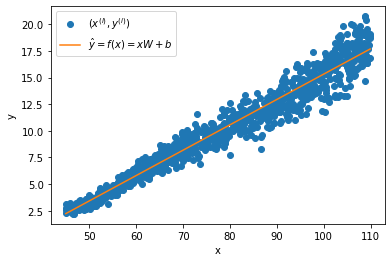

In [4]:

plt.plot(train_x, train_y, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(train_x)], [torch.max(train_x)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()